# Bengali Digits Classification using CNN

***Import python libraries***

In [1]:
# For plot and mathematical operation
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# For reading images and image manipulation
import os
import cv2
import glob

# For Machine Learning
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.densenet import DenseNet169
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

# For confusion matrix, precision, recall,  f1-score
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# To export the tested model into a pickle file
import pickle

print('Successfully import all libraries ')

Successfully import all libraries 


***Data Loading***

In [2]:
images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob('dataset/**/*.png',recursive=True)]

In [3]:
df = pd.read_csv('dataset/training-a.csv')
df.size

137914

In [4]:
df.tail(3)

,filename,original filename,scanid,digit,database name original,contributing team,database name
19699,a19699.png,Scan_253_digit_8_num_4.png,253,8,BHDDB,Buet_Broncos,training-a
19700,a19700.png,Scan_27_digit_3_num_6.png,27,3,BHDDB,Buet_Broncos,training-a
19701,a19701.png,Scan_91_digit_8_num_2.png,91,8,BHDDB,Buet_Broncos,training-a


In [5]:
df1 = df.drop(['original filename', 'scanid', 'database name original', 'contributing team', 'database name'], axis=1)
df1.head(3)

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1


In [6]:
df1.size

39404

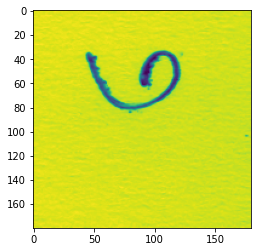

In [7]:
plt.imshow(images[1])
plt.show()

In [8]:
images[1].shape

(180, 180)

***Ploting the number of data in each level***

In [9]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

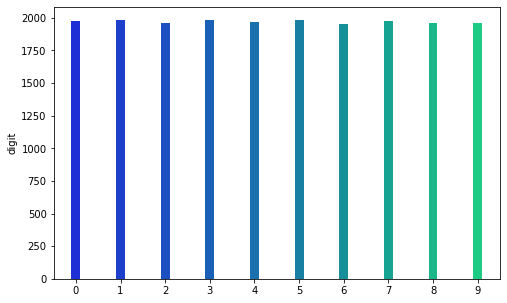

In [10]:
sns.set_style()
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=df1.digit.unique(),y=df1.digit.value_counts(),palette='winter',ax=ax)
change_width(ax, .20)
plt.show()

In [11]:
y = df1['digit']

In [12]:
data = []
for im in images:
    new = cv2.resize(im, (28,28)) # Resizing the image
    data.append(new)

In [13]:
X_tt = []
for im in data:
    X_tt.append(tf.convert_to_tensor(im))
type(X_tt)

list

In [14]:
x = np.array(X_tt).reshape(-1, 28, 28, 1)

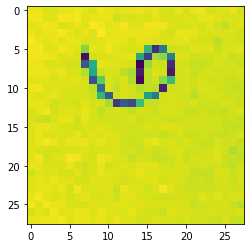

In [15]:
plt.imshow(x[1])
plt.show()

In [16]:
# Label encoding y
lbl = LabelEncoder()
y = lbl.fit_transform(y)

# Converting it into a categorical variable
y = to_categorical(y)

In [17]:
y.shape

(19702, 10)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [19]:
print('Training Features Shape: ', X_train.shape)
print('Training Labels Shape: ', y_train.shape)
print('Testing Features Shape: ', X_test.shape)
print('Testing Labels Shape: ', y_test.shape)

Training Features Shape:  (14776, 28, 28, 1)
Training Labels Shape:  (14776, 10)
Testing Features Shape:  (4926, 28, 28, 1)
Testing Labels Shape:  (4926, 10)


6


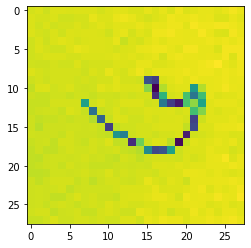

In [20]:
print(np.argmax(np.round(y_test[2])))
plt.imshow(X_test[2])
plt.show()

***Creating the 2D-CNN architecture using the Sequential model from TensorFlow***

In [21]:
input_img_shape = x.shape[1:]
print(input_img_shape)

(28, 28, 1)


In [22]:
model_1 = Sequential()

# Adding a 2D convolution layer
model_1.add(Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=input_img_shape))

# Adding a max-pooling layer
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a 2D convolution layer
model_1.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))

# Adding a max-pooling layer
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a flatten layer
model_1.add(Flatten())

# Adding a dense layer
model_1.add(Dense(128, activation="relu"))

# Adding a dense layer
model_1.add(Dense(64, activation="relu"))

# Adding a dense layer with softmax activation
model_1.add(Dense(10, activation="softmax"))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [23]:
start_time = datetime.now()

# Initializing an Adam optimizer
opt = Adam(lr=1e-3, decay=1e-5)

# Configuring the model for training
model_1.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Training the model
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=5, validation_split=0.2)

end_time = datetime.now()
print("\n*Time required to train model: ",end_time - start_time)

C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
2364/2364 [==============================] - 22s 9ms/step - loss: 1.3685 - accuracy: 0.5694 - val_loss: 0.7000 - val_accuracy: 0.7581
Epoch 2/20
2364/2364 [==============================] - 20s 9ms/step - loss: 0.5397 - accuracy: 0.8173 - val_loss: 0.5227 - val_accuracy: 0.8315
Epoch 3/20
2364/2364 [==============================] - 20s 9ms/step - loss: 0.4007 - accuracy: 0.8595 - val_loss: 0.6132 - val_accuracy: 0.8126
Epoch 4/20
2364/2364 [==============================] - 21s 9ms/step - loss: 0.3108 - accuracy: 0.8956 - val_loss: 0.4372 - val_accuracy: 0.8627
Epoch 5/20
2364/2364 [==============================] - 20s 8ms/step - loss: 0.2571 - accuracy: 0.9113 - val_loss: 0.4418 - val_accuracy: 0.8704
Epoch 6/20
2364/2364 [==============================] - 20s 8ms/step - loss: 0.2092 - accuracy: 0.9261 - val_loss: 0.4194 - val_accuracy: 0.8860
Epoch 7/20
2364/2364 [==============================] - 21s 9ms/step - loss: 0.2009 - accuracy: 0.9296 - val_loss: 0.4508 - val_ac

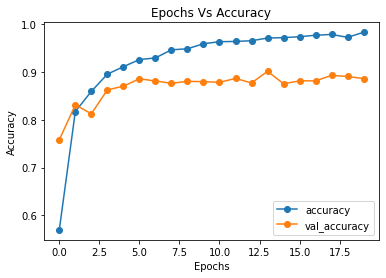

In [24]:
plt.plot(np.array((history_1.history)['accuracy']),'-o')
plt.plot(np.array((history_1.history)['val_accuracy']),'-o')
plt.title("Epochs Vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['accuracy','val_accuracy'])
plt.show()

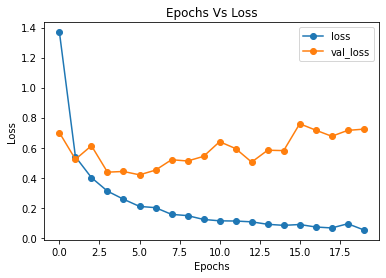

In [25]:
plt.plot(np.array((history_1.history)['loss']),'-o')
plt.plot(np.array((history_1.history)['val_loss']),'-o')
plt.title("Epochs Vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['loss','val_loss'])
plt.show()

In [26]:
model = model_1
predictions = model.predict(X_test)

***Test Loss and Test Accuracy***

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

154/154 [==============================] - 1s 9ms/step - loss: 0.6984 - accuracy: 0.8952
Test loss: 0.6983577013015747
Test accuracy: 0.8952497243881226


In [28]:
def Print_label(i):
    plt.imshow(X_test[i].reshape(28, 28), cmap = plt.cm.binary) 
    plt.show()
    print("Predicted value: ", np.argmax(np.round(predictions[i])))
    print("True value: ", np.argmax(y_test[i]))

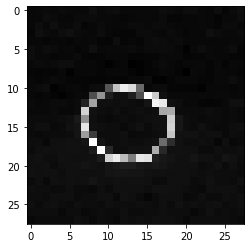

Predicted value:  0
True value:  0


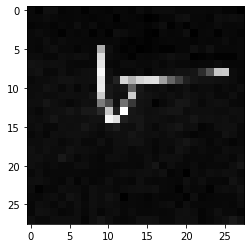

Predicted value:  8
True value:  8


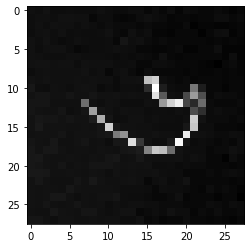

Predicted value:  6
True value:  6


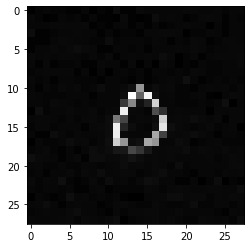

Predicted value:  0
True value:  0


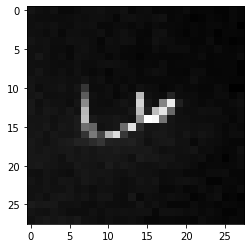

Predicted value:  6
True value:  6


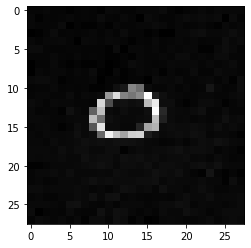

Predicted value:  0
True value:  0


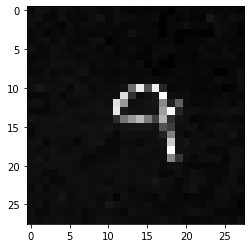

Predicted value:  7
True value:  7


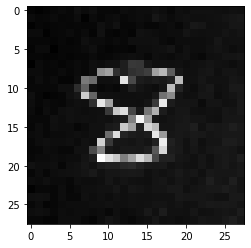

Predicted value:  4
True value:  4


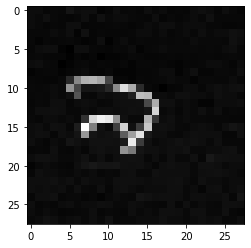

Predicted value:  9
True value:  9


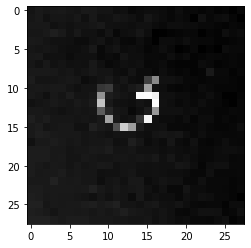

Predicted value:  3
True value:  6


In [29]:
for i in range(10):
    Print_label(i)

***Confusion Matrix***

In [30]:
y_pred = [np.argmax(np.round(predictions[i])) for i in range(len(X_test))]
y_true = [np.argmax(y_test[i]) for i in range(len(X_test))]

In [31]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.inferno):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

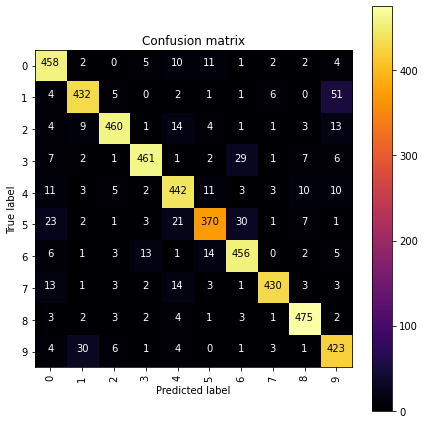

In [32]:
cm = confusion_matrix(y_true,y_pred)
cm_plot = plot_confusion_matrix(cm,classes=[i for i in range(10)])

In [33]:
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_true, y_pred), '.2f'),'\n\n')
target=[str(i) for i in range(10)]
print('Classification Report'.center(65,'-'),'\n', metrics.classification_report(y_true,y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.89 


----------------------Classification Report---------------------- 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       495
           1       0.89      0.86      0.88       502
           2       0.94      0.90      0.92       510
           3       0.94      0.89      0.92       517
           4       0.86      0.88      0.87       500
           5       0.89      0.81      0.84       459
           6       0.87      0.91      0.89       501
           7       0.96      0.91      0.93       473
           8       0.93      0.96      0.94       496
           9       0.82      0.89      0.85       473

    accuracy                           0.89      4926
   macro avg       0.90      0.89      0.89      4926
weighted avg       0.90      0.89      0.89      4926



***Export the tested model to a pickle file***

In [34]:
with open('Face_mask_detection_model.pickle','wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://e1e07536-1118-450a-b7f7-6e0cea8f3fa3/assets
